Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy import stats


** Reading of the file of the given dataset **

In [2]:
# Read the CSV file
file_path = 'C:\SARTHAK\WineQuality\winequality-red.csv'
data = pd.read_csv(file_path)

# Now you can use the .head() method to display the first few rows of the DataFrame
data.head(10)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\admin\AppData\Local\Temp\ipykernel_19820\2916374112.py:2: SyntaxWarning: invalid escape sequence '\S'
  file_path = 'C:\SARTHAK\WineQuality\winequality-red.csv'


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


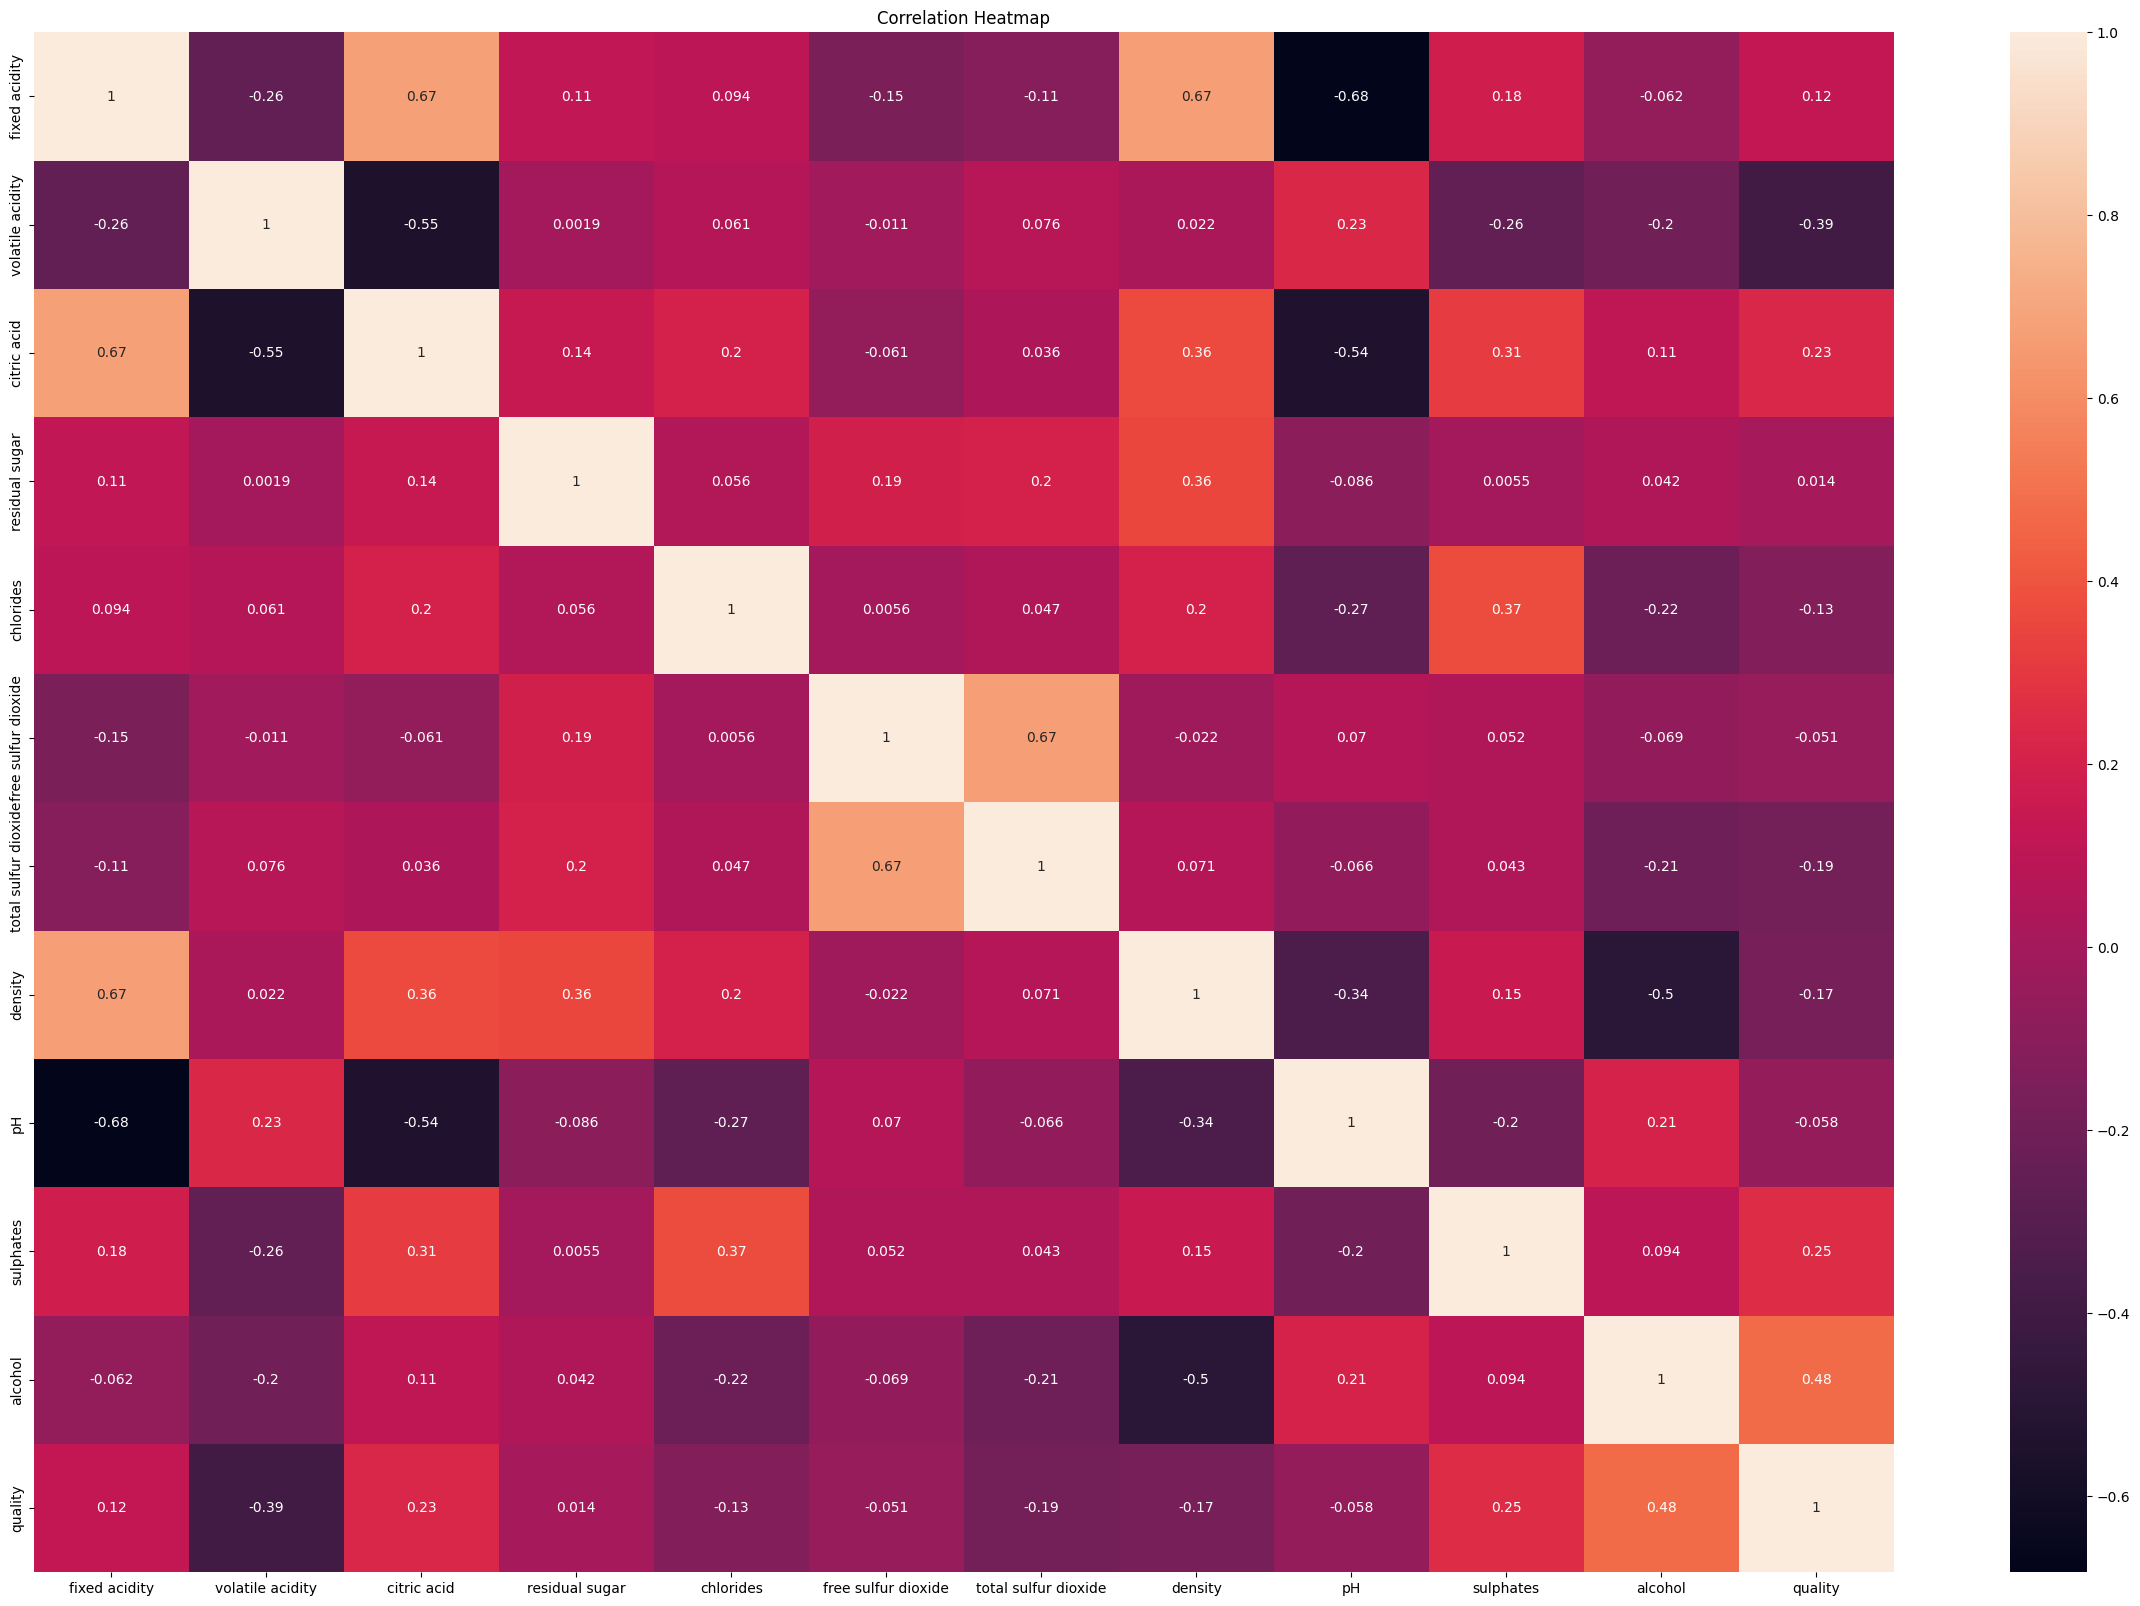

In [3]:
# Plotting the correlation heatmap
plt.figure(figsize=(30, 20))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [4]:
# Removing outliers using z-score
z = np.abs(stats.zscore(data))
new_data = data[(z < 3).all(axis=1)]

In [5]:
# Splitting the data into features (x) and target (y)
x = new_data.drop(columns='quality')
y = new_data['quality']

In [6]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Fitting the Random Forest Classifier
rf_classificationModel = RandomForestClassifier(n_estimators=100)
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier()

In [8]:
# Making predictions
y_pred = rf_classificationModel.predict(x_test)

In [9]:
# Calculating accuracy score
accuracy_score_decimal = metrics.accuracy_score(y_test, y_pred)
accuracy_score_percent = accuracy_score_decimal * 100
print('Accuracy Score:', accuracy_score_percent, '%')

Accuracy Score: 68.04123711340206 %


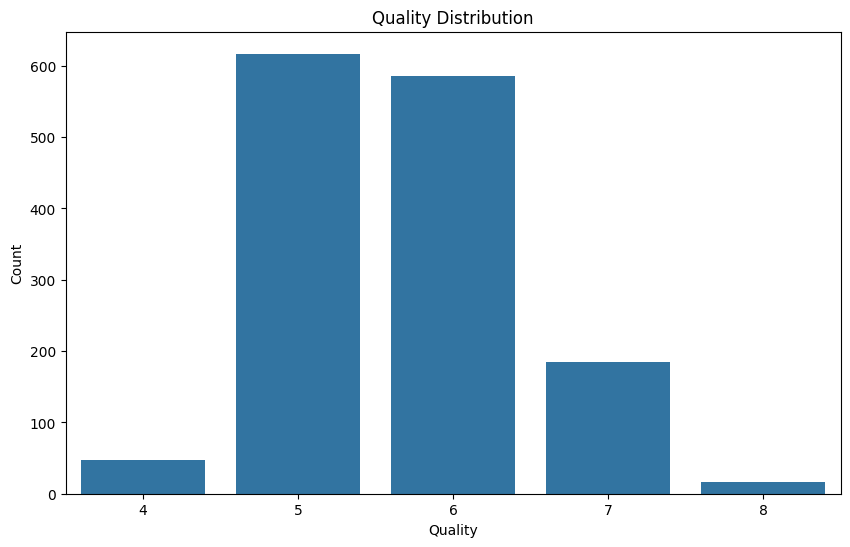

In [10]:
# Visualizing quality distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=new_data, x='quality')
plt.title('Quality Distribution')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

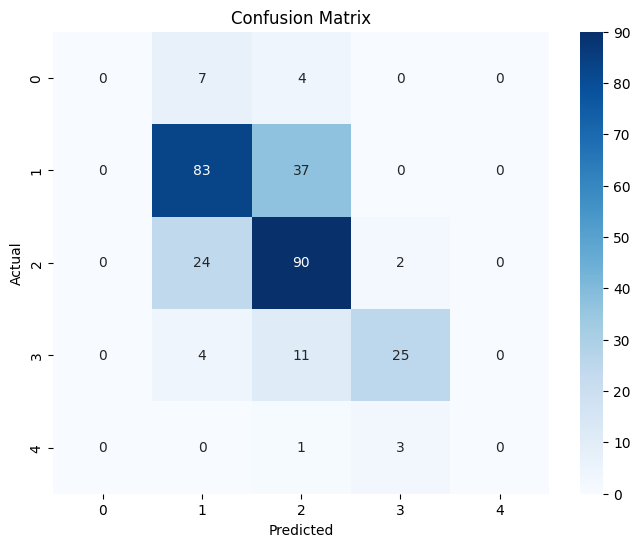

In [11]:
# Plotting Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

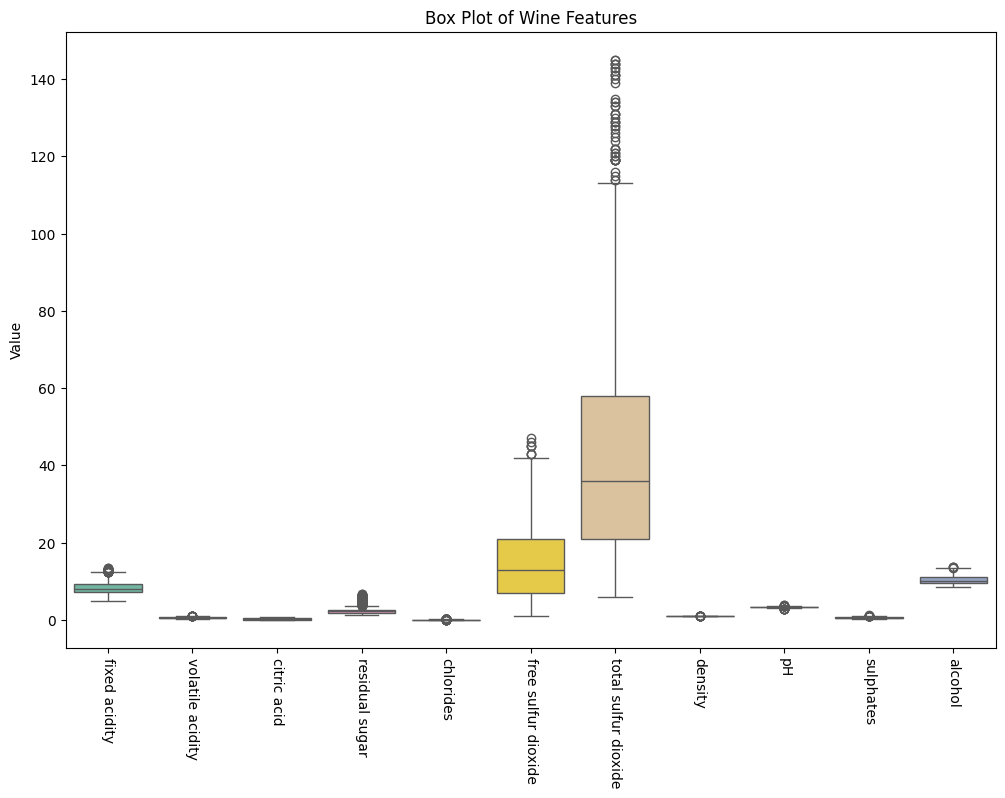

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'new_data' is already defined
# Selecting relevant columns for the box plot
selected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
                    'pH', 'sulphates', 'alcohol']

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=new_data[selected_columns], orient="v", palette="Set2")
plt.title("Box Plot of Wine Features")
plt.ylabel("Value")
plt.xticks(rotation=270)
plt.show()


In [13]:
print('Accuracy Score:', accuracy_score_percent, '%')


Accuracy Score: 68.04123711340206 %
